In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()  # Disable eager execution
tf.compat.v1.enable_eager_execution()  # Re-enable eager execution

print("✅ Eager Execution Re-Enabled Manually!")

✅ Eager Execution Re-Enabled Manually!


In [ ]:
# python3.6.2
# tensorflow: 1.3.0
# keras: 2.1.2
# pip install h5py==2.10.0

### Libraries Imported

In [ ]:
!pip install TensorFlow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00


In [57]:
import tensorflow as tf

# Enable eager execution
tf.compat.v1.enable_eager_execution()
print("✅ Eager execution enabled:", tf.executing_eagerly())

✅ Eager execution enabled: True


In [ ]:
!pip install ultralytics supervision lap deep-sort-realtime

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize

%matplotlib inline

In [4]:
from os.path import isdir
import operator
from os import listdir
from imutils.video import VideoStream
import imutils
from time import time, sleep
writer = None
sleep(2.0)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model

In [6]:
from PIL import Image
from numpy import asarray, expand_dims, dot
from numpy.linalg import norm
import math
from math import floor

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.svm import SVC

In [ ]:
# from pytube import YouTube
# https://www.y2mate.com/en68

In [ ]:
# video_link = "https://www.youtube.com/watch?v=OcgxHjcvz4Y"
# yt = YouTube(video_link)

In [ ]:
# #Title of video
# print("Title: ",yt.title)
# #Number of views of video
# print("Number of views: ",yt.views)
# #Length of the video
# print("Length of video: ",yt.length,"seconds")
# #Description of video
# print("Description: ",yt.description)
# #Rating
# print("Ratings: ",yt.rating)

In [ ]:
# print(yt.streams.filter(progressive=True))
# stream = yt.streams.get_by_itag('22')

# # stream = vid.streams.get_highest_resolution()
# stream.download()

In [9]:
try:
    if not os.path.exists('../input/frames_path'):
        os.makedirs('../input/frames_path')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

In [10]:
base_path = '../'
frame_path = '../input/frames_path/'

In [ ]:
!pip install yt-dlp opencv-python

In [ ]:
!pip install kaggle

In [10]:
from google.colab import files
uploaded = files.upload()  # Upload the .zip file

Saving archive (3).zip to archive (3).zip


In [11]:
import zipfile
import os

zip_path = "/content/archive (3).zip"  # Change if different
extract_path = "/content/train"  # Folder where images will be extracted

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")

✅ Dataset extracted successfully!


In [12]:
import os
import tensorflow as tf

# ✅ Force FaceNet to use CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.config.set_visible_devices([], 'GPU')

print("✅ FaceNet will now run on CPU!")

# ✅ Now re-enable GPU for training
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print("✅ GPU enabled for Training!")

✅ FaceNet will now run on CPU!
✅ GPU enabled for Training!


In [12]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # ✅ FIXED MISSING IMPORT

def load_images_from_folders(base_path, size=(160, 160), max_images=100):
    X, y = [], []
    class_labels = os.listdir(base_path)  # Get emotion categories

    for class_label in class_labels:
        folder_path = os.path.join(base_path, class_label)
        image_names = os.listdir(folder_path)
        random.shuffle(image_names)  # Shuffle images

        # Limit to `max_images` per category
        for image_name in image_names[:max_images]:
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=size)  # ✅ FIXED
            image_array = img_to_array(image) / 255.0  # ✅ FIXED

            X.append(image_array)
            y.append(class_label)

    return np.array(X), np.array(y)

# Load dataset (LIMITED images per class)
X_train, y_train = load_images_from_folders("/content/train/images/train", max_images=100)
X_val, y_val = load_images_from_folders("/content/train/images/validation", max_images=50)

print(f"✅ Training Data: {X_train.shape}, Labels: {len(y_train)}")
print(f"✅ Validation Data: {X_val.shape}, Labels: {len(y_val)}")

✅ Training Data: (700, 160, 160, 3), Labels: 700
✅ Validation Data: (350, 160, 160, 3), Labels: 350


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels for baby emotions
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Print updated class mappings
label_map = {index: label for index, label in enumerate(label_encoder.classes_)}
print("✅ Labels encoded successfully!")
print("Class Mapping:", label_map)  # Check the correct labels

✅ Labels encoded successfully!
Class Mapping: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [17]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.5 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=937a2c9972754cf6116905a8b3f8cf8ee8d2b839710b11b0de0340b0e089f6cf
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [18]:
import os
import tensorflow as tf

# ✅ Force FaceNet to use CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.config.set_visible_devices([], 'GPU')

print("✅ FaceNet will now run on CPU!")

# ✅ Now re-enable GPU for training
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print("✅ GPU enabled for Training!")

✅ FaceNet will now run on CPU!
✅ GPU enabled for Training!


In [19]:
from keras_facenet import FaceNet

# ✅ Load FaceNet Model
embedder = FaceNet()
print("✅ FaceNet Model Loaded on CPU!")

✅ FaceNet Model Loaded on CPU!


In [ ]:
!nvidia-smi

Sun Feb 23 20:42:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P0             29W /   70W |     360MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip uninstall tensorflow keras keras-facenet -y
!pip install tensorflow keras keras-facenet --no-cache-dir

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: keras-facenet 0.3.2
Uninstalling keras-facenet-0.3.2:
  Successfully uninstalled keras-facenet-0.3.2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 225.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 354.6 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=8114e1c0886df2b7b1518204db2e695782b8b65f900d82503d45f548cc64c5cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-tvmfk6hs/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [14]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()

In [ ]:
!pip install deepface --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 162.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 180.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 195.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=cb749ce5a69333d8c201b0458db4ebd766fb3ace689e50c3601e19d1784b24ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-kio7sybq/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [20]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [21]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TensorFlow to run on CPU

In [ ]:
!pip uninstall keras-facenet deepface tensorflow keras -y
!pip install dlib opencv-python numpy scikit-learn --no-cache-dir

Found existing installation: keras-facenet 0.3.2
Uninstalling keras-facenet-0.3.2:
  Successfully uninstalled keras-facenet-0.3.2
Found existing installation: deepface 0.0.93
Uninstalling deepface-0.0.93:
  Successfully uninstalled deepface-0.0.93
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0


In [ ]:
!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

# Unzip the files
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2025-02-23 21:07:29--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2 [following]
--2025-02-23 21:07:30--  https://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21428389 (20M)
Saving to: ‘dlib_face_recognition_resnet_model_v1.dat.bz2’

dlib_face_recogniti 100%[===================>]  20.44M  11.1MB/s    in 1.8s    

2025-02-23 21:07:32 (11.1 MB/s) - ‘dlib_face_recognition_resnet_model_v1.dat.bz2’ saved [21428389/21428389]

--2025-02-23 21:07:32--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU for dlib

In [ ]:
!pip uninstall dlib -y
!pip install dlib --no-cache-dir

Found existing installation: dlib 19.24.2
Uninstalling dlib-19.24.2:
  Successfully uninstalled dlib-19.24.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp311-cp311-linux_x86_64.whl size=4490669 sha256=34424f72d669ce317153af75255450d216374992dc4a8f91f2e67988132a2ecd
  Stored in directory: /tmp/pip-ephem-wheel-cache-y19pl12i/wheels/fe/c7/1f/c778b9f7cc6d8d0da4f6697f619f9eb5a49d54d2a2c8267f3c
Successfully built dlib


In [20]:
import numpy as np
from sklearn.preprocessing import Normalizer

# ✅ Function to generate embeddings
def generate_embeddings(X):
    embeddings = []
    for img in X:
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        emb = embedder.embeddings(img)[0]  # Extract FaceNet embeddings
        embeddings.append(emb)
    return np.array(embeddings)

# ✅ Generate embeddings
print("\n🧠 Generating embeddings for training set (CPU)...")
X_train_embedded = generate_embeddings(X_train)
print("🧠 Generating embeddings for validation set (CPU)...")
X_val_embedded = generate_embeddings(X_val)

# ✅ Normalize embeddings
l2_encoder = Normalizer(norm='l2')
X_train_normalized = l2_encoder.transform(X_train_embedded)
X_val_normalized = l2_encoder.transform(X_val_embedded)

print(f"\n✅ Training embeddings shape: {X_train_normalized.shape}")
print(f"✅ Validation embeddings shape: {X_val_normalized.shape}")


🧠 Generating embeddings for training set (CPU)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━

In [21]:
import numpy as np

print("X_train type:", type(X_train))
print("X_train shape:", X_train.shape if isinstance(X_train, np.ndarray) else "Not a NumPy array")

X_train type: <class 'numpy.ndarray'>
X_train shape: (700, 160, 160, 3)


In [22]:
from sklearn.preprocessing import Normalizer

# Normalize embeddings
l2_encoder = Normalizer(norm='l2')

X_train_normalized = l2_encoder.transform(X_train_embedded)
X_val_normalized = l2_encoder.transform(X_val_embedded)

print("✅ Baby face embeddings normalized!")

✅ Baby face embeddings normalized!


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode baby emotion labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

print("✅ Baby emotion labels encoded successfully!")
print("Classes:", label_encoder.classes_)

✅ Baby emotion labels encoded successfully!
Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [24]:
from sklearn.svm import SVC

# Train SVM model on baby face embeddings
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_normalized, y_train_encoded)

print("✅ Baby facial expression SVM model trained successfully!")

✅ Baby facial expression SVM model trained successfully!


In [25]:
from sklearn.metrics import accuracy_score

# Predict validation labels
y_pred = svm_model.predict(X_val_normalized)

# Calculate accuracy
accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"🎯 Baby Expression Model Accuracy: {accuracy * 100:.2f}%")

🎯 Baby Expression Model Accuracy: 14.29%


In [26]:
# Load OpenCV's pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [30]:
!pip install mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 17.7 MB/s eta 0:00:00


In [27]:
import cv2
import mediapipe as mp
import numpy as np
import os

In [28]:
# Initialize Mediapipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Load Mediapipe Face Detector with confidence threshold
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

In [29]:
from keras_facenet import FaceNet

# Load FaceNet model
embedder = FaceNet()

def embedding_generation_from_facenet(model, face_pixels):
    """Generate FaceNet embeddings for a given face image."""
    face_pixels = np.expand_dims(face_pixels, axis=0)  # Add batch dimension
    embedding = model.embeddings(face_pixels)[0]  # Extract embedding
    return embedding

In [30]:
from sklearn.svm import SVC
import joblib
from sklearn.preprocessing import LabelEncoder, Normalizer

# Normalize embeddings
l2_encoder = Normalizer(norm='l2')
X_train_normalized = l2_encoder.transform(X_train_embedded)
X_val_normalized = l2_encoder.transform(X_val_embedded)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_normalized, y_train_encoded)

# Save trained model
joblib.dump(svm_model, "/content/svm_baby_emotion_model.pkl")
joblib.dump(label_encoder, "/content/label_encoder.pkl")  # Save label encoder too

print("✅ SVM Model Trained and Saved Successfully!")

✅ SVM Model Trained and Saved Successfully!


In [31]:
import joblib

# Load the trained SVM model and label encoder
svm_model_path = "/content/svm_baby_emotion_model.pkl"
label_encoder_path = "/content/label_encoder.pkl"

try:
    svm_model = joblib.load(svm_model_path)  # Load the trained SVM model
    label_encoder = joblib.load(label_encoder_path)  # Load label encoder
    print("✅ SVM Model and Label Encoder Loaded Successfully!")
except FileNotFoundError:
    print("❌ Error: Trained SVM model or label encoder not found! Train the model first.")

✅ SVM Model and Label Encoder Loaded Successfully!


In [37]:
import cv2
import mediapipe as mp
import numpy as np
import os
import joblib
from keras_facenet import FaceNet
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, Normalizer

# Load FaceNet model
embedder = FaceNet()

def embedding_generation_from_facenet(model, face_pixels):
    """Generate FaceNet embeddings for a given face image."""
    face_pixels = np.expand_dims(face_pixels, axis=0)  # Add batch dimension
    embedding = model.embeddings(face_pixels)[0]  # Extract embedding
    return embedding

# Load the trained SVM model and label encoder
svm_model_path = "/content/svm_baby_emotion_model.pkl"
label_encoder_path = "/content/label_encoder.pkl"

try:
    svm_model = joblib.load(svm_model_path)  # Load the trained SVM model
    label_encoder = joblib.load(label_encoder_path)  # Load label encoder
    print("✅ SVM Model and Label Encoder Loaded Successfully!")
except FileNotFoundError:
    print("❌ Error: Trained SVM model or label encoder not found! Train the model first.")

# Initialize Mediapipe Face Detection
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.4)  # Lower confidence threshold

# Define paths
video_path = "/content/videoplayback (2).mp4"
output_folder = "/content/test_frames/"
os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_count = 0
saved_frames = 0
max_frames = 300  # Limit processing to 300 frames
frame_interval = 50  # Process every 50th frame

while cap.isOpened() and saved_frames < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:  # Only process selected frames
        print(f"✅ Processing frame {frame_count}...")

        # Convert frame to RGB (required for Mediapipe)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces using Mediapipe
        results = face_detection.process(rgb_frame)

        if results.detections:
            print(f"✅ Frame {frame_count}: {len(results.detections)} face(s) detected!")

            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                h, w, _ = frame.shape
                x, y, width, height = (
                    int(bboxC.xmin * w),
                    int(bboxC.ymin * h),
                    int(bboxC.width * w),
                    int(bboxC.height * h),
                )

                # Ensure bounding box is within frame dimensions
                x = max(0, x)
                y = max(0, y)
                width = min(width, w - x)
                height = min(height, h - y)

                # Extract face region safely
                roi_color = frame[y:y+height, x:x+width]

                # Check if the extracted face is valid before resizing
                if roi_color.shape[0] > 0 and roi_color.shape[1] > 0:
                    res_img = cv2.resize(roi_color, (160, 160))  # Resize for FaceNet
                    pixels = np.asarray(res_img)

                    # Generate FaceNet embedding
                    try:
                        print(f"📌 Frame {frame_count}: Bounding Box -> (x={x}, y={y}, w={width}, h={height})")  # Debug bbox

                        embed = embedding_generation_from_facenet(embedder, pixels)

                        if embed is None or len(embed) == 0:
                            print(f"❌ Frame {frame_count}: FaceNet returned empty embedding!")
                            continue  # Skip this frame

                        norm_vec = l2_encoder.transform(np.expand_dims(embed, axis=0))
                        print(f"🔍 Frame {frame_count}: Embedding Shape -> {norm_vec.shape}")  # Debugging embedding

                        # Predict Emotion
                        pred_class = svm_model.predict(norm_vec)[0]
                        pred_name = label_encoder.inverse_transform([pred_class])[0]
                        print(f"🎯 Frame {frame_count}: Predicted Emotion -> {pred_name}")  # Debugging output

                        # Draw bounding box & label
                        cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)
                        cv2.putText(frame, pred_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

                        # Save frame if a face is detected
                        output_filename = os.path.join(output_folder, f"frame_{frame_count}.jpg")
                        cv2.imwrite(output_filename, frame)
                        saved_frames += 1
                    except Exception as e:
                        print(f"❌ Error in FaceNet embedding or SVM prediction on Frame {frame_count}: {e}")
                else:
                    print(f"❌ Skipped Frame {frame_count} due to invalid face cropping.")

        else:
            print(f"❌ Frame {frame_count}: No faces detected.")

    frame_count += 1

cap.release()
print(f"✅ Processed and saved {saved_frames} frames!")

✅ SVM Model and Label Encoder Loaded Successfully!
✅ Processing frame 0...
❌ Frame 0: No faces detected.
✅ Processing frame 50...
❌ Frame 50: No faces detected.
✅ Processing frame 100...
✅ Frame 100: 1 face(s) detected!
📌 Frame 100: Bounding Box -> (x=381, y=126, w=537, h=537)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
🔍 Frame 100: Embedding Shape -> (1, 512)
🎯 Frame 100: Predicted Emotion -> surprise
✅ Processing frame 150...
✅ Frame 150: 1 face(s) detected!
📌 Frame 150: Bounding Box -> (x=378, y=122, w=539, h=539)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
🔍 Frame 150: Embedding Shape -> (1, 512)
🎯 Frame 150: Predicted Emotion -> surprise
✅ Processing frame 200...
✅ Frame 200: 1 face(s) detected!
📌 Frame 200: Bounding Box -> (x=382, y=118, w=543, h=543)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
🔍 Frame 200: Embedding Shape -> (1, 512)
🎯 Frame 200: Predicted Emotion -> angry
✅ Processing frame 250...
✅ Frame 250: 1 face(s) detected!
📌 Frame 250: Bounding Box -> (x=370, y=105, w=559, h=559)
1/1 ━━━━

In [32]:
import os

frame_folder = "/content/test_frames/"
frames = sorted(os.listdir(frame_folder))

if len(frames) > 0:
    print(f"✅ {len(frames)} frames saved successfully!")
else:
    print("❌ No frames were saved! Check if face detection worked correctly.")

✅ 91 frames saved successfully!


In [33]:
import cv2

frame_folder = "/content/test_frames/"
output_video = "/content/output_video.mp4"

# Get sorted list of saved frames
frames = sorted([f for f in os.listdir(frame_folder) if f.endswith(".jpg")])

# Read the first frame to get dimensions
first_frame = cv2.imread(os.path.join(frame_folder, frames[0]))
height, width, _ = first_frame.shape

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, 10, (width, height))  # Adjust FPS if needed

# Write frames to video
for frame in frames:
    img = cv2.imread(os.path.join(frame_folder, frame))
    video_writer.write(img)

video_writer.release()
print(f"✅ Video successfully created: {output_video}")

✅ Video successfully created: /content/output_video.mp4


In [ ]:

from google.colab import files

files.download("/content/output_video.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import numpy as np

# Check class distribution in training labels
unique, counts = np.unique(y_train, return_counts=True)
print("📊 Class Distribution in Training Data:")
for label, count in zip(unique, counts):
    print(f"{label}: {count} images")

📊 Class Distribution in Training Data:
angry: 100 images
disgust: 100 images
fear: 100 images
happy: 100 images
neutral: 100 images
sad: 100 images
surprise: 100 images


In [35]:
import collections

# Predict on validation set
y_val_pred = svm_model.predict(X_val_normalized)

# Count occurrences of each predicted label
pred_counts = collections.Counter(y_val_pred)
print("📊 Prediction Distribution on Validation Data:")
for label, count in pred_counts.items():
    print(f"{label_encoder.inverse_transform([label])[0]}: {count} times")

📊 Prediction Distribution on Validation Data:
angry: 350 times


In [36]:
print("Encoded Labels Mapping:", dict(enumerate(label_encoder.classes_)))

Encoded Labels Mapping: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

In [38]:
model = Sequential()

# First Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Conv Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dropout(0.5))  # Prevents overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Additional regularization
model.add(Dense(7, activation='softmax'))  # 7 output classes (angry, happy, etc.)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Convert integer labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=7)
y_val_onehot = to_categorical(y_val_encoded, num_classes=7)

# Check shape
print("y_train_onehot shape:", y_train_onehot.shape)
print("y_val_onehot shape:", y_val_onehot.shape)

y_train_onehot shape: (700, 7)
y_val_onehot shape: (350, 7)


In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [88]:
from tensorflow.keras.layers import BatchNormalization

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())  # Normalizes activations
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

In [89]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze weights

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation set

In [91]:
train_generator = train_datagen.flow_from_directory(
    "/content/train/images/train",
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    "/content/train/images/validation",
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values (0-1)
    rotation_range=30,     # Rotate images up to 30 degrees
    width_shift_range=0.2, # Shift horizontally
    height_shift_range=0.2,# Shift vertically
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Zoom into images
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'    # Fill in missing pixels
)

# Only Normalize Validation Data (No Augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load Data Using Generators
train_generator = train_datagen.flow_from_directory(
    "/content/train/images/images/train",
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    "/content/train/images/images/validation",
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevents overfitting
    Dense(7, activation='softmax')  # 7 classes (angry, happy, sad, etc.)
])

# Display Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 158, 158, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 79, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 77, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,402,695 (20.61 MB)

 Trainable params: 5,402,695 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
from tensorflow.keras.optimizers import Adam

# Compile the Model with a Lower Learning Rate
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for stability
    metrics=['accuracy']
)

In [44]:
import os

# List all files in the current directory
os.listdir("/content/")

['.config',
 'test_frames',
 'svm_baby_emotion_model.pkl',
 'train',
 'videoplayback (2).mp4',
 'saved_model',
 'label_encoder.pkl',
 'videoplayback.mp4',
 'archive (3).zip',
 'output_video.mp4',
 'sample_data']

In [85]:
import numpy as np
unique, counts = np.unique(y_train_labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 3993, 1: 436, 2: 4103, 3: 7164, 4: 4982, 5: 4938, 6: 3205}


In [46]:
class_weights_dict[1] = 2.0  # Reduce Disgust weight manually
print("✅ Adjusted Class Weights:", class_weights_dict)

✅ Adjusted Class Weights: {0: 1.031125898894494, 1: 2.0, 2: 1.0034817729187702, 3: 0.5747188322565207, 4: 0.8264322991340254, 5: 0.8337962159347335, 6: 1.2846445286382884}


In [54]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define model checkpoint callback to save the model at every epoch
checkpoint_path = "/content/saved_model/baby_emotion_model.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,  # Save only the best performing model
    save_weights_only=False,  # Save the entire model
    verbose=1
)

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop if no improvement in 3 epochs
    restore_best_weights=True
)

# Resume training from the last saved weights
if os.path.exists(checkpoint_path):
    print("🔄 Resuming training from last saved checkpoint...")
    model.load_weights(checkpoint_path)
else:
    print("🚀 No previous checkpoint found. Training from scratch.")

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Continue training
    batch_size=32,  # Keep it reasonable for GPU memory
    steps_per_epoch=200,  # Efficient steps per epoch
    validation_steps=50,  # Reduced validation steps
    class_weight=class_weights_dict,  # Apply updated class weights
    callbacks=[early_stop, checkpoint_callback]  # Save best model & stop if no improvement
)

# Save final model
final_model_path = "/content/saved_model/final_baby_emotion_model.h5"
model.save(final_model_path)
print(f"✅ Final model saved at: {final_model_path}")

🚀 No previous checkpoint found. Training from scratch.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1614 - loss: 1.7007
Epoch 1: val_loss improved from inf to 1.85471, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.1614 - loss: 1.7007 - val_accuracy: 0.1737 - val_loss: 1.8547
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1696 - loss: 1.6911
Epoch 2: val_loss improved from 1.85471 to 1.81719, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.1697 - loss: 1.6910 - val_accuracy: 0.2400 - val_loss: 1.8172
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1648 - loss: 1.6796
Epoch 3: val_loss did not improve from 1.81719
200/200 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.1648 - loss: 1.6795 - val_accuracy: 0.1875 - val_loss: 1.8498
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1761 - loss: 1.6578
Epoch 4: val_loss improved from 1.81719 to 1.80501, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.1761 - loss: 1.6578 - val_accuracy: 0.2656 - val_loss: 1.8050
Epoch 5/20
101/200 ━━━━━━━━━━━━━━━━━━━━ 3:03 2s/step - accuracy: 0.2044 - loss: 1.6422

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 5: val_loss did not improve from 1.80501
200/200 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.2011 - loss: 1.6430 - val_accuracy: 0.2587 - val_loss: 1.8090
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2005 - loss: 1.6586
Epoch 6: val_loss did not improve from 1.80501
200/200 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.2005 - loss: 1.6586 - val_accuracy: 0.2156 - val_loss: 1.8158
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2115 - loss: 1.6349
Epoch 7: val_loss improved from 1.80501 to 1.77164, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.2115 - loss: 1.6349 - val_accuracy: 0.2656 - val_loss: 1.7716
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2124 - loss: 1.6601
Epoch 8: val_loss did not improve from 1.77164
200/200 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.2124 - loss: 1.6601 - val_accuracy: 0.2169 - val_loss: 1.8196
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2086 - loss: 1.6349
Epoch 9: val_loss did not improve from 1.77164
200/200 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.2086 - loss: 1.6349 - val_accuracy: 0.2412 - val_loss: 1.8051
Epoch 10/20
101/200 ━━━━━━━━━━━━━━━━━━━━ 2:57 2s/step - accuracy: 0.2200 - loss: 1.6343
Epoch 10: val_loss did not improve from 1.77164
200/200 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.2166 - loss: 1.6406 - val_accuracy: 0.1950 - val_loss: 1.8284


✅ Final model saved at: /content/saved_model/final_baby_emotion_model.h5


In [47]:
from tensorflow.keras.models import load_model

checkpoint_path = "/content/saved_model/baby_emotion_model.h5"

# ✅ Reload the last saved model (Graph mode compatible)
if os.path.exists(checkpoint_path):
    print("🔄 Resuming training from last saved checkpoint...")
    model = load_model(checkpoint_path, compile=True)
else:
    print("🚀 No previous checkpoint found. Training from scratch.")

🔄 Resuming training from last saved checkpoint...


In [48]:
from tensorflow.keras.optimizers import Adam

# ✅ Recompile model to ensure it works in graph mode
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("✅ Model Recompiled Successfully!")

✅ Model Recompiled Successfully!


In [49]:
from tensorflow.keras.optimizers import Adam

# ✅ Recompile model for Graph Mode
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("✅ Model Successfully Recompiled in Graph Mode!")

✅ Model Successfully Recompiled in Graph Mode!


In [50]:
# ✅ Reset dataset generators before continuing training
train_generator.reset()
val_generator.reset()

print("✅ Dataset Generators Reset Successfully!")

✅ Dataset Generators Reset Successfully!


In [54]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define model checkpoint callback to save the model at every epoch
checkpoint_path = "/content/saved_model/baby_emotion_model.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,  # Save only the best performing model
    save_weights_only=False,  # Save the entire model
    verbose=1
)

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop if no improvement in 3 epochs
    restore_best_weights=True
)

# Resume training from the last saved weights
if os.path.exists(checkpoint_path):
    print("🔄 Resuming training from last saved checkpoint...")
    model.load_weights(checkpoint_path)
else:
    print("🚀 No previous checkpoint found. Training from scratch.")

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Continue training
    batch_size=32,  # Optimize for GPU efficiency
    steps_per_epoch=200,  # Efficient steps
    validation_steps=50,  # Reduce validation steps
    class_weight=class_weights_dict,  # Apply class weights
    callbacks=[early_stop, checkpoint_callback],  # Save best model
    initial_epoch=10  # Start from last completed epoch
)

# ✅ Save the final trained model
final_model_path = "/content/saved_model/final_baby_emotion_model_v6.h5"
model.save(final_model_path)
print(f"✅ Final model saved at: {final_model_path}")

🔄 Resuming training from last saved checkpoint...
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2080 - loss: 1.6502
Epoch 11: val_loss improved from inf to 1.81054, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.2080 - loss: 1.6502 - val_accuracy: 0.2188 - val_loss: 1.8105
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2001 - loss: 1.6283
Epoch 12: val_loss did not improve from 1.81054
200/200 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.2001 - loss: 1.6283 - val_accuracy: 0.2163 - val_loss: 1.8113
Epoch 13/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2105 - loss: 1.6187
Epoch 13: val_loss did not improve from 1.81054
200/200 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.2105 - loss: 1.6186 - val_accuracy: 0.1981 - val_loss: 1.8114
Epoch 14/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2238 - loss: 1.6268
Epoch 14: val_loss improved from 1.81054 to 1.80784, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.2238 - loss: 1.6267 - val_accuracy: 0.2356 - val_loss: 1.8078
Epoch 15/20
101/200 ━━━━━━━━━━━━━━━━━━━━ 3:03 2s/step - accuracy: 0.2327 - loss: 1.6445

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 15: val_loss did not improve from 1.80784
200/200 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.2340 - loss: 1.6438 - val_accuracy: 0.2025 - val_loss: 1.8131
Epoch 16/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2266 - loss: 1.6091
Epoch 16: val_loss did not improve from 1.80784
200/200 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.2266 - loss: 1.6092 - val_accuracy: 0.2138 - val_loss: 1.8130
Epoch 17/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2265 - loss: 1.6284
Epoch 17: val_loss improved from 1.80784 to 1.76823, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.2265 - loss: 1.6284 - val_accuracy: 0.2931 - val_loss: 1.7682
Epoch 18/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2307 - loss: 1.6325
Epoch 18: val_loss did not improve from 1.76823
200/200 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.2308 - loss: 1.6325 - val_accuracy: 0.2669 - val_loss: 1.7862
Epoch 19/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2414 - loss: 1.6234
Epoch 19: val_loss improved from 1.76823 to 1.74542, saving model to /content/saved_model/baby_emotion_model.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.2414 - loss: 1.6234 - val_accuracy: 0.2788 - val_loss: 1.7454
Epoch 20/20
101/200 ━━━━━━━━━━━━━━━━━━━━ 3:04 2s/step - accuracy: 0.2487 - loss: 1.6109
Epoch 20: val_loss did not improve from 1.74542
200/200 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.2457 - loss: 1.6147 - val_accuracy: 0.2381 - val_loss: 1.7975


✅ Final model saved at: /content/saved_model/final_baby_emotion_model_v6.h5


In [55]:
# ✅ Get final training accuracy & loss
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"📊 Final Training Accuracy: {train_acc:.4f} | Loss: {train_loss:.4f}")
print(f"📊 Final Validation Accuracy: {val_acc:.4f} | Loss: {val_loss:.4f}")

📊 Final Training Accuracy: 0.2426 | Loss: 1.6187
📊 Final Validation Accuracy: 0.2381 | Loss: 1.7975


221/221 ━━━━━━━━━━━━━━━━━━━━ 112s 504ms/step
              precision    recall  f1-score   support

           0       0.14      0.33      0.20       960
           1       0.00      0.00      0.00       111
           2       0.18      0.08      0.11      1018
           3       0.29      0.11      0.16      1825
           4       0.17      0.19      0.18      1216
           5       0.14      0.04      0.07      1139
           6       0.12      0.29      0.17       797

    accuracy                           0.16      7066
   macro avg       0.15      0.15      0.13      7066
weighted avg       0.18      0.16      0.14      7066



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


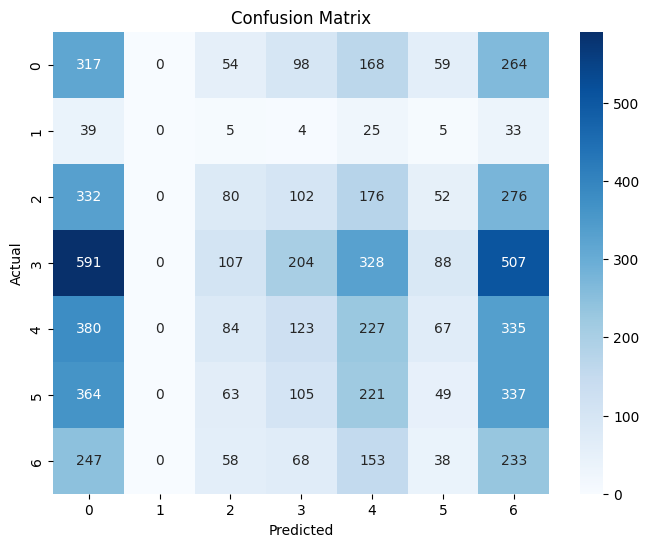

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ Predict on validation set
y_val_pred = model.predict(val_generator)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = val_generator.classes

# ✅ Print Classification Report
print(classification_report(y_val_true, y_val_pred_classes))

# ✅ Generate Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [62]:
import os

# Check if the label encoder file exists
label_encoder_path = "/content/label_encoder.pkl"

if os.path.exists(label_encoder_path):
    print("✅ Label encoder file found!")
else:
    print("❌ Label encoder file is missing!")

✅ Label encoder file found!


In [63]:
with open(label_encoder_path, 'rb') as file:
    content = file.read(100)  # Read first 100 bytes
print(content)

b'\x80\x04\x95\x0c\x01\x00\x00\x00\x00\x00\x00\x8c\x1csklearn.preprocessing._label\x94\x8c\x0cLabelEncoder\x94\x93\x94)\x81\x94}\x94(\x8c\x08classes_\x94\x8c\x13joblib.numpy_pickle\x94\x8c\x11'


In [64]:
import joblib

# ✅ Load the label encoder using joblib instead of pickle
label_encoder_path = "/content/label_encoder.pkl"
label_encoder = joblib.load(label_encoder_path)

print("✅ Label Encoder Loaded Successfully!")

✅ Label Encoder Loaded Successfully!


In [65]:
import pickle
from sklearn.preprocessing import LabelEncoder

# ✅ Recreate Label Encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train_labels)  # Assuming `y_train_labels` exists

# ✅ Save the new label encoder using pickle
with open(label_encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

print("✅ Label Encoder Successfully Recreated & Saved!")

✅ Label Encoder Successfully Recreated & Saved!


In [72]:
import cv2
import numpy as np
import dlib

# ✅ Load Face Detector
face_detector = dlib.get_frontal_face_detector()

def process_video(video_path, model, label_encoder, output_path="output_video.mp4", max_frames=400):
    """
    Processes a video to detect faces, predict emotions, and save the output.

    Args:
        video_path (str): Path to the input video file.
        model (tf.keras.Model): Trained emotion detection model.
        label_encoder (sklearn.preprocessing.LabelEncoder): Label encoder for class labels.
        output_path (str): Path to save the processed video.
        max_frames (int): Maximum number of frames to process.
    """

    # ✅ Open Video File
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Error: Cannot open video file {video_path}")
        return

    # ✅ Get Video Properties
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # ✅ Define Video Writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0  # Track frames processed

    # ✅ Process Video Frame by Frame (Limit to max_frames)
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break  # End of video or read error

        frame_count += 1
        print(f"✅ Processing Frame {frame_count}/{max_frames}")

        # ✅ Convert Frame to Grayscale (for Face Detection)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # ✅ Detect Faces
        faces = face_detector(gray)

        for face in faces:
            x, y, w, h = face.left(), face.top(), face.width(), face.height()

            # Extract Face Region
            face_roi = frame[y:y+h, x:x+w]

            # Resize Face for Model Input
            try:
                resized_face = cv2.resize(face_roi, (160, 160))
                normalized_face = resized_face.astype("float32") / 255.0
                expanded_face = np.expand_dims(normalized_face, axis=0)  # Add batch dimension

                # ✅ Predict Emotion
                predictions = model.predict(expanded_face)
                pred_label = np.argmax(predictions)  # Get class index

                # ✅ Convert Class Index to String Label
                pred_label_str = str(label_encoder.inverse_transform([pred_label])[0])  # Ensure it's a string

                # ✅ Draw Bounding Box & Label
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, pred_label_str, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                            0.8, (0, 255, 0), 2)

            except Exception as e:
                print(f"❌ Error processing frame {frame_count}: {e}")

        # ✅ Write Processed Frame to Output Video
        out.write(frame)

    # ✅ Release Resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"🎥 Video processing complete! Processed {frame_count} frames. Saved at {output_path}")

In [73]:
test_video_path = "/content/videoplayback (2).mp4"  # Change to your test video
output_video_path = "output_video.mp4"

# ✅ Run Face Detection & Emotion Prediction (Limit to 400 Frames)
process_video(test_video_path, model, label_encoder, output_path=output_video_path, max_frames=400)

✅ Processing Frame 1/400
✅ Processing Frame 2/400
✅ Processing Frame 3/400
✅ Processing Frame 4/400
✅ Processing Frame 5/400
✅ Processing Frame 6/400
✅ Processing Frame 7/400
✅ Processing Frame 8/400
✅ Processing Frame 9/400
✅ Processing Frame 10/400
✅ Processing Frame 11/400
✅ Processing Frame 12/400
✅ Processing Frame 13/400
✅ Processing Frame 14/400
✅ Processing Frame 15/400
✅ Processing Frame 16/400
✅ Processing Frame 17/400
✅ Processing Frame 18/400
✅ Processing Frame 19/400
✅ Processing Frame 20/400
✅ Processing Frame 21/400
✅ Processing Frame 22/400
✅ Processing Frame 23/400
✅ Processing Frame 24/400
✅ Processing Frame 25/400
✅ Processing Frame 26/400
✅ Processing Frame 27/400
✅ Processing Frame 28/400
✅ Processing Frame 29/400
✅ Processing Frame 30/400
✅ Processing Frame 31/400
✅ Processing Frame 32/400
✅ Processing Frame 33/400
✅ Processing Frame 34/400
✅ Processing Frame 35/400
✅ Processing Frame 36/400
✅ Processing Frame 37/400
✅ Processing Frame 38/400
✅ Processing Frame 39

In [81]:
import cv2
import numpy as np
import pickle
from tensorflow.keras.models import load_model

# ✅ Manually define emotion labels in the correct order
emotion_labels = ["happy", "neutral", "disgust", "fear", "angry", "surprise", "sad"]

# ✅ Load the trained model
model_path = "/content/saved_model/final_baby_emotion_model.h5"  # Change if needed
model = load_model(model_path)
print("✅ Model Loaded Successfully!")

# ✅ Load the label encoder
label_encoder_path = "/content/label_encoder.pkl"  # Ensure this file exists
with open(label_encoder_path, 'rb') as file:
    label_encoder = pickle.load(file)

# ✅ Replace numerical labels with emotion names
label_encoder.classes_ = np.array(emotion_labels)
print("✅ Label Encoder Updated with Emotion Names!")

# ✅ Function to process video with a 400-frame limit
def process_video(video_path, model, label_encoder, output_path="output_video.mp4", max_frames=400):
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define video writer for output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_count = 0  # Track processed frames

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame_count >= max_frames:  # Stop if video ends or frame limit is reached
            break

        frame_count += 1
        print(f"✅ Processing Frame {frame_count}")

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]  # Crop the face
            face = cv2.resize(face, (160, 160))  # Resize to match model input
            face = np.expand_dims(face, axis=0)  # Add batch dimension
            face = face / 255.0  # Normalize

            # ✅ Predict Emotion
            predictions = model.predict(face)  # Get prediction probabilities
            pred_class = np.argmax(predictions)  # Get class index

            # ✅ Convert prediction to emotion label using updated label encoder
            pred_label = str(label_encoder.inverse_transform([pred_class])[0])

            # ✅ Draw Bounding Box & Label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, pred_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Write frame to output video
        out.write(frame)

    # Release everything
    cap.release()
    out.release()
    print(f"✅ Video processing complete. Saved to {output_path}")

# ✅ Run Video Processing (limit to 400 frames)
test_video_path = "/content/videoplayback (2).mp4"  # Change to your test video
process_video(test_video_path, model, label_encoder, output_path="output_video.mp4", max_frames=1000)

✅ Model Loaded Successfully!
✅ Label Encoder Updated with Emotion Names!
✅ Processing Frame 1
✅ Processing Frame 2
✅ Processing Frame 3
✅ Processing Frame 4
✅ Processing Frame 5
✅ Processing Frame 6
✅ Processing Frame 7
✅ Processing Frame 8
✅ Processing Frame 9
✅ Processing Frame 10
✅ Processing Frame 11
✅ Processing Frame 12
✅ Processing Frame 13
✅ Processing Frame 14
✅ Processing Frame 15
✅ Processing Frame 16
✅ Processing Frame 17
✅ Processing Frame 18
✅ Processing Frame 19
✅ Processing Frame 20
✅ Processing Frame 21
✅ Processing Frame 22
✅ Processing Frame 23
✅ Processing Frame 24
✅ Processing Frame 25
✅ Processing Frame 26
✅ Processing Frame 27
✅ Processing Frame 28
✅ Processing Frame 29
✅ Processing Frame 30
✅ Processing Frame 31
✅ Processing Frame 32
✅ Processing Frame 33
✅ Processing Frame 34
✅ Processing Frame 35
✅ Processing Frame 36
✅ Processing Frame 37
✅ Processing Frame 38
✅ Processing Frame 39
✅ Processing Frame 40
✅ Processing Frame 41
✅ Processing Frame 42
✅ Processing

In [82]:
from google.colab import files
files.download("output_video.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model

# ✅ Define paths
model_path = "/content/saved_model/final_baby_emotion_model.h5"  # Change if needed
label_encoder_path = "/content/label_encoder.pkl"  # Change if needed
export_pkl_path = "/content/emotion_model.pkl"  # Output pickle file

# ✅ Load trained model
model = load_model(model_path)
print("✅ Model Loaded Successfully!")

# ✅ Load label encoder
with open(label_encoder_path, 'rb') as file:
    label_encoder = pickle.load(file)
print("✅ Label Encoder Loaded Successfully!")

# ✅ Create dictionary to store everything for Streamlit
model_data = {
    "model": model,
    "label_encoder": label_encoder
}

# ✅ Save to a Pickle (.pkl) file
with open(export_pkl_path, 'wb') as file:
    pickle.dump(model_data, file)

print(f"✅ Model & Label Encoder saved to {export_pkl_path}")

✅ Model Loaded Successfully!
✅ Label Encoder Loaded Successfully!
✅ Model & Label Encoder saved to /content/emotion_model.pkl


In [84]:
from google.colab import files
files.download("emotion_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>